*Introdução*

	*Olá candidato(a), o objetivo deste desafio é testar os seus conhecimentos sobre a resolução de problemas de negócios, análise de dados e aplicação de modelos preditivos. Queremos testar seus conhecimentos dos conceitos estatísticos de modelos preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning.  É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema.*

*Desafio*

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado).





In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns

In [2]:
# Coletando os dados com pandas
precificacao = pd.read_csv(r'C:\Users\usuario\Downloads\teste_indicium_precificacao.csv')

In [3]:
# Analisando os dados coletados
# (os 5 primeiros registros)
precificacao.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
# Gerando algumas estatísticas da base de dados
precificacao.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Verificando a existêencia de algum valor nulo ou ausente, e verificando a quantidade
precificacao.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [6]:
# Verificando o tipo de cada variável
precificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [7]:
# Começando o tratamento dos dados ausentes
# Preenchendo o campo [nome], que é o nome do anúncio, com "Não especificado"
# A função fillna() é usada para preencher os valores faltantes na coluna especificada com o valor padrão desejado
# O argumento inplace=True faz com que as alterações sejam feitas diretamente no DataFrame original, sem a necessidade de atribuir o resultado de volta a uma variável.
precificacao['nome'].fillna("Não especificado", inplace=True)

# Seguimos a mesma abordagem para o campo [host_name], que é o nome do usuário anunciante.
precificacao['host_name'].fillna("Desconhecido", inplace=True)

# Para o campo [ultima_review], que contém a data da última revisão dada à listagem,
# Vamos preencher com uma data padrão, 1900-01-01, que representa uma data inicial
precificacao['ultima_review'].fillna("1900-01-01", inplace=True)

# Para o campo [reviews_por_mes], que contém o número de avaliações fornecidas por mês,
# Vamos preencher com 0
precificacao['reviews_por_mes'].fillna(0, inplace=True)

In [8]:
#Fazendo uma análise de correlação entre as variáveis

precificacao.corr(numeric_only=True)

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,1.000000,0.588282,-0.003178,0.090896,0.010618,-0.013235,-0.319782,0.180208,0.133274,0.085541
host_id,0.588282,1.000000,0.020199,0.127049,0.015309,-0.017370,-0.140113,0.209776,0.154951,0.203535
latitude,-0.003178,0.020199,1.000000,0.084777,0.033939,0.024861,-0.015399,-0.018775,0.019517,-0.010926
longitude,0.090896,0.127049,0.084777,1.000000,-0.150020,-0.062750,0.059092,0.138512,-0.114713,0.082751
price,0.010618,0.015309,0.033939,-0.150020,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081833
minimo_noites,-0.013235,-0.017370,0.024861,-0.062750,0.042799,1.000000,-0.080118,-0.124909,0.127960,0.144320
numero_de_reviews,-0.319782,-0.140113,-0.015399,0.059092,-0.047954,-0.080118,1.000000,0.589406,-0.072376,0.172047
reviews_por_mes,0.180208,0.209776,-0.018775,0.138512,-0.050564,-0.124909,0.589406,1.000000,-0.047313,0.163760
calculado_host_listings_count,0.133274,0.154951,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047313,1.000000,0.225711
disponibilidade_365,0.085541,0.203535,-0.010926,0.082751,0.081833,0.144320,0.172047,0.163760,0.225711,1.000000


[Text(0.5, 1.0, 'Correlaçao entre variáveis numéricas')]

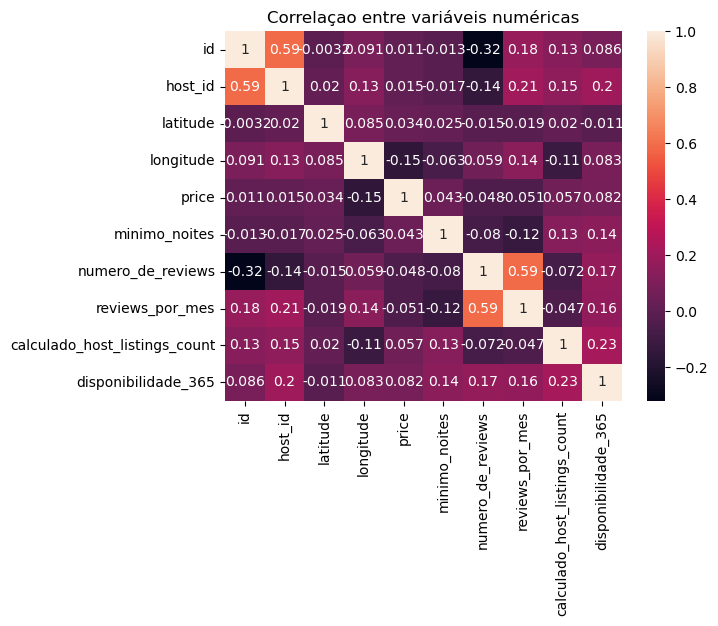

In [9]:
# Agora, vamos fazer uma análise gráfica da correlação
# Para isso, criamos um gráfico de calor
# A variável annot serve para trazer os valores dentro do gráfico
correlacao = precificacao.corr(numeric_only=True)
sns.heatmap(correlacao, annot=True).set(title='Correlaçao entre variáveis numéricas')

*Entregas*

#1 - Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?



In [11]:
# Temos os campos [disponibilidade_365], que contém o número de dias em que o anúncio está disponível para reserva
# Ou seja, se a disponibilidade é alta, não deve haver muita procura nessa região
# E o campo [numero_de_reviews], que contém o número de comentários dados a cada listagem
# Ou seja, se há mais comentários, o local é mais procurado
# Então, devemos encontrar o primeiro bairro que ocorra de haver disponibilidade baixa e reviews altos

# Primeiro, calculamos a disponibilidade média de aluguel ao longo do ano para cada bairro
disponibilidade_media = precificacao.groupby('bairro')['disponibilidade_365'].mean()

# Ordenamos os bairros com base na disponibilidade média (do menor para o maior)
bairros_por_disponibilidade = disponibilidade_media.sort_values().index.tolist()

# Calculamos o número total de reviews para cada bairro
total_reviews = precificacao.groupby('bairro')['numero_de_reviews'].sum()

# Ordenamos os bairros com base no número total de reviews (do maior para o menor)
bairros_por_reviews = total_reviews.sort_values(ascending=False).index.tolist()

# Encontramos a primeira área que ocorre em ambas as listas
primeiro_bairro_com_ocorrencia_comum = next(bairro for bairro in bairros_por_disponibilidade if bairro in bairros_por_reviews)

# Encontramos o bairro correspondente à primeira área encontrada
bairro_group_correspondente = precificacao[precificacao['bairro'] == primeiro_bairro_com_ocorrencia_comum]['bairro_group'].iloc[0]


print(f"A área mais indicada para compra é {primeiro_bairro_com_ocorrencia_comum}, no bairro {bairro_group_correspondente}" )

A área mais indicada para compra é Bay Terrace, Staten Island, no bairro Staten Island



#2 - O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?



Como observado no mapa de calor gerado na questão 1, a correlação entre o preço e o número mínimo de noites é de apenas 0,043, o que indica uma relação extremamente fraca. Da mesma forma, a correlação entre o preço e a disponibilidade é de 0,082, também considerada muito baixa. Portanto, essas variáveis não exercem influência significativa sobre o preço.




#3 - Existe algum padrão no texto do nome do local para lugares de mais alto valor?



In [12]:
# Listando o campo [bairro] com base no maior [price] para o menor

# Ordenando o DataFrame com base no preço (price) em ordem decrescente
precificacao_sorted = precificacao.sort_values(by='price', ascending=False)

# Extraindo os bairros correspondentes
bairros_por_price = precificacao_sorted['bairro'].head(50).tolist()

# Imprimindo os bairros
print("Bairros ordenados com base no maior price para o menor price:")
for bairro in bairros_por_price:
    print(bairro)

Bairros ordenados com base no maior price para o menor price:
Astoria
Upper West Side
Greenpoint
Lower East Side
Lower East Side
East Harlem
Tribeca
Clinton Hill
Upper East Side
East Flatbush
Battery Park City
Chelsea
Upper West Side
Clinton Hill
Tribeca
Upper East Side
Greenwich Village
Upper West Side
Little Italy
Midtown
Nolita
Randall Manor
Harlem
Cypress Hills
Bedford-Stuyvesant
Bedford-Stuyvesant
Williamsburg
Clinton Hill
Bay Ridge
Bedford-Stuyvesant
Chelsea
Hell's Kitchen
Prospect Heights
Upper West Side
West Village
Greenwich Village
Greenwich Village
Battery Park City
East Village
Upper West Side
Upper East Side
East Village
Upper West Side
Chelsea
Harlem
Chelsea
Gramercy
Financial District
Theater District
Upper West Side


Alguns bairros possuem os termos: Upper, West, East e Side, que se referem à localização geográfica na cidade. 

#4 - Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?



Estamos lidando com um problema de regressão, já que o objetivo é prever um valor numérico contínuo, especificamente o preço.

As variáveis que podem ser utilizadas para prever o preço incluem [disponibilidade_365], [calculado_host_listings_count] e [reviews_por_mes], pois, de acordo com a análise de correlação, essas são as que apresentam maior relação com o preço, nessa ordem de importância.

No contexto de previsão de preços, onde múltiplas variáveis independentes podem estar envolvidas e as relações entre elas e o preço podem não ser lineares, a regressão polinomial pode ser uma opção interessante. No entanto, é importante estar ciente de que esse método pode levar a overfitting, especialmente se o grau do polinômio for muito alto, além de ser mais difícil de interpretar em comparação com modelos mais simples.

Se a interpretabilidade for uma prioridade e as relações entre as variáveis forem predominantemente lineares, a regressão linear pode ser uma escolha mais adequada. Esse modelo é rápido de treinar e fácil de interpretar, mas é sensível a outliers, o que pode afetar sua precisão.

Para avaliar o desempenho dos modelos de regressão, é importante escolher uma métrica que esteja alinhada com os objetivos do projeto. Se o foco for minimizar erros absolutos, o Erro Absoluto Médio (MAE) é uma métrica adequada, pois mede a média das diferenças absolutas entre os valores previstos e os reais. Por outro lado, se o objetivo for entender o quanto o modelo consegue explicar a variabilidade dos dados, o Coeficiente de Determinação (R²) é mais apropriado. Um valor de R² próximo a 1 indica que o modelo explica bem a variância dos dados, enquanto um valor próximo a 0 sugere que o modelo não se ajusta bem aos dados.

#5 - Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?


225 USD